In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [3]:
df_model = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Final Project\Churn Project Files\DataFiles\df_model.csv") 

In [4]:
df_model.columns

Index(['SeniorCitizen', 'MonthlyCharges_Log', 'TotalCharges_Log',
       'PhoneService_new', 'Contract_new', 'PaperlessBilling_new',
       'PaymentMethod_new', 'Churn_new', 'gender_new', 'Partner_new',
       'Dependents_new', 'MultipleLines_new', 'InternetService_new',
       'OnlineSecurity_new', 'OnlineBackup_new', 'DeviceProtection_new',
       'TechSupport_new', 'StreamingTV_new', 'StreamingMovies_new',
       'tenureCatLabel_new'],
      dtype='object')

In [5]:
df_model.drop(['PaymentMethod_new', 'Partner_new', 'Dependents_new','DeviceProtection_new','StreamingTV_new', 'StreamingMovies_new','tenureCatLabel_new'], axis=1, inplace=True)

In [6]:
df_model.head()

,SeniorCitizen,MonthlyCharges_Log,TotalCharges_Log,PhoneService_new,Contract_new,PaperlessBilling_new,Churn_new,gender_new,MultipleLines_new,InternetService_new,OnlineSecurity_new,OnlineBackup_new,TechSupport_new
0,0,3.396185,3.396185,0,0,1,0,0,1,0,0,2,0
1,0,4.042174,7.544068,1,1,0,0,1,0,0,2,0,0
2,0,3.986202,4.683519,1,0,1,1,1,0,0,2,2,0
3,0,3.744787,7.517928,0,1,0,0,1,1,0,2,0,2
4,0,4.258446,5.021575,1,0,1,1,0,0,1,0,0,0


In [7]:
# Separating the dataframe between the X (independent) and y (dependent) variables
X = df_model.drop('Churn_new', axis=1).select_dtypes(include=[np.number])
y = df_model['Churn_new']

In [8]:
# Splitting the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [9]:
X_test

,SeniorCitizen,MonthlyCharges_Log,TotalCharges_Log,PhoneService_new,Contract_new,PaperlessBilling_new,gender_new,MultipleLines_new,InternetService_new,OnlineSecurity_new,OnlineBackup_new,TechSupport_new
939,0,4.380150,7.601402,1,0,1,1,0,1,0,0,0
3723,0,2.998229,7.091451,1,2,1,1,0,2,1,1,1
1756,0,3.196630,7.322246,1,2,1,1,2,2,1,1,1
2278,0,4.270397,4.270397,1,0,1,1,0,1,0,0,0
1867,0,2.980619,6.689910,1,2,0,0,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0,2.960105,6.627380,1,1,0,0,0,2,1,1,1
4511,0,4.695011,8.740769,1,1,1,0,2,1,0,2,2
3596,0,4.191925,7.832966,1,0,1,0,2,0,2,2,0
6736,0,4.034241,5.460011,1,0,0,0,0,0,0,2,2


In [32]:
y_test

939     0
3723    0
1756    0
2278    1
1867    0
       ..
1843    0
4511    0
3596    0
6736    1
1501    0
Name: Churn_new, Length: 1758, dtype: int64

In [11]:
# Printing the X_train 
print(df_model.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(7031, 13)
(5273, 12)
(1758, 12)
(5273,)
(1758,)


# Scaling X

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.4393022 ,  0.3869026 , -1.71045932, ..., -0.92164876,
        -1.03691856, -0.93164536],
       [-0.4393022 ,  0.61090839, -0.740343  , ...,  1.40419661,
        -1.03691856, -0.93164536],
       [-0.4393022 ,  1.08791135,  1.16538985, ...,  1.40419661,
        -1.03691856, -0.93164536],
       ...,
       [-0.4393022 ,  0.17251542,  0.69610248, ...,  1.40419661,
        -1.03691856,  1.38724347],
       [-0.4393022 ,  1.00040292,  1.211428  , ..., -0.92164876,
         1.23512448, -0.93164536],
       [-0.4393022 , -1.71828849, -0.26807539, ...,  0.24127393,
         0.09910296,  0.22779906]])

# PCA for Feature Selection

In [13]:
# Performing PCA

pca = PCA()
pca.fit(X_train_scaled)
#X_train_pca =pca.transform(X_train_scaled)

PCA()

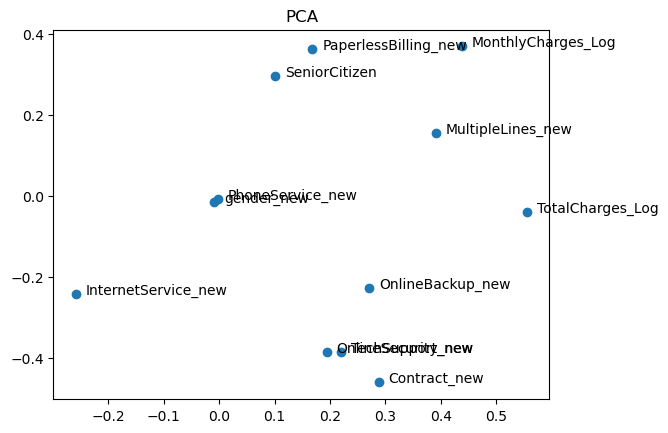

In [14]:
#creating a pca object with n componenets
pca = PCA(n_components=8)

#fitting and transforming data using PCA
pca.fit(X_train_scaled)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(X.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(7,0), textcoords='offset points')

In [15]:
print(sum(pca.explained_variance_ratio_ *100))

85.33265353084617


In [16]:
pca.explained_variance_ratio_ *100

array([20.54638777, 18.02108712, 11.27743958,  8.35062822,  7.69431719,
        6.77353913,  6.43387198,  6.23538254])

Text(0.5, 1.0, 'Explained Variance of PCA features')

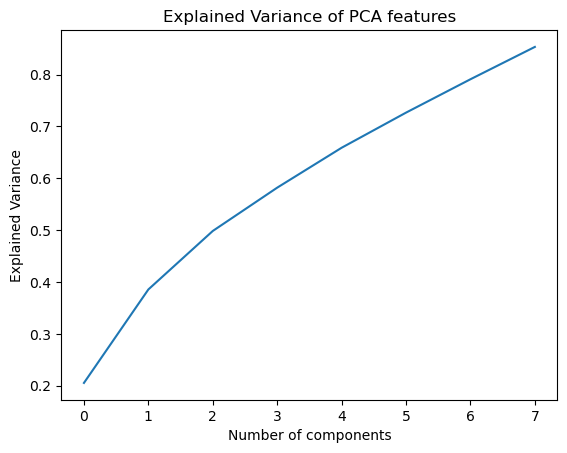

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCA features')

# Elbow Curve for Feature Selection

In [18]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [19]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.754985222585652
2 : 2.3694265260289145
3 : 2.201652745033008
4 : 2.0295369528998304
5 : 1.9346533121930596
6 : 1.862874198548618
7 : 1.795752023888442
8 : 1.7377807515790538
9 : 1.6883207972969263


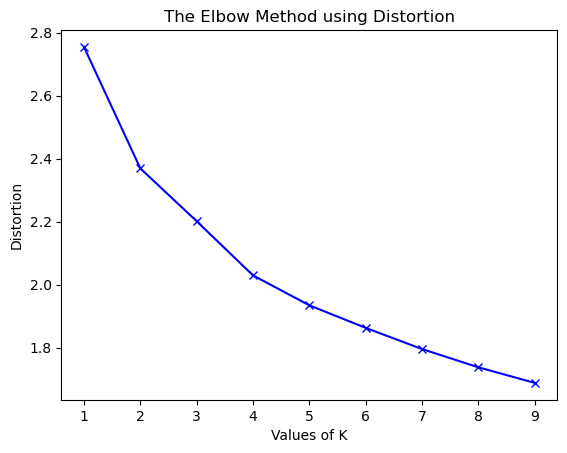

In [20]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Modelling

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

## Logistic Regression

In [22]:
logModel = LogisticRegression(max_iter=1000, random_state=100)
logModel.fit(X_train, y_train)
y_pred_logModel=logModel.predict(X_test)
y_pred_logModel

# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_logModel))
print("Precision: ", precision_score(y_test, y_pred_logModel))
print("Recall: ", recall_score(y_test, y_pred_logModel))
print("F1-score: ", f1_score(y_test, y_pred_logModel))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_logModel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logModel))

Accuracy:  0.7895335608646189
Precision:  0.6314432989690721
Recall:  0.5190677966101694
F1-score:  0.569767441860465
ROC-AUC score:  0.7039351424730474
Confusion Matrix:
 [[1143  143]
 [ 227  245]]


## Random Forest Classifier

In [23]:
rfcModel = RandomForestClassifier(n_estimators=1000, random_state=100)
rfcModel.fit(X_train, y_train)
y_pred_rfc=rfcModel.predict(X_test)
y_pred_rfc


# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))
print("Precision: ", precision_score(y_test, y_pred_rfc))
print("Recall: ", recall_score(y_test, y_pred_rfc))
print("F1-score: ", f1_score(y_test, y_pred_rfc))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))

Accuracy:  0.7787258248009101
Precision:  0.6055979643765903
Recall:  0.5042372881355932
F1-score:  0.5502890173410404
ROC-AUC score:  0.6918542583757282
Confusion Matrix:
 [[1131  155]
 [ 234  238]]


## Decision Tree

In [24]:
dtcModel = DecisionTreeClassifier()
dtcModel.fit(X_train,y_train)
y_pred_dtcModel=dtcModel.predict(X_test)
y_pred_dtcModel

# Printing the evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_dtcModel))
print("Precision: ", precision_score(y_test, y_pred_dtcModel))
print("Recall: ", recall_score(y_test, y_pred_dtcModel))
print("F1-score: ", f1_score(y_test, y_pred_dtcModel))
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred_dtcModel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtcModel))


Accuracy:  0.7349260523321957
Precision:  0.5063025210084033
Recall:  0.510593220338983
F1-score:  0.5084388185654007
ROC-AUC score:  0.6639280254105492
Confusion Matrix:
 [[1051  235]
 [ 231  241]]


### Analysis Modelling

Based on the results above Logistic Model is performing the best overall. We have 2 options, we can take only the logistic model to do hyperparameter tuning or test out all the models. We will try grid search on all the models to see the results. 

# Hyper Parameter Tuning using Grid Search
(Grid Search to imporve the results)
In machine learning, hyperparameter tuning is the process of optimizing a model’s hyperparameters to improve its performance on a given dataset.it is important to tune the hyperparameters so that the model can learn and generalize well on unseen data. Grid Search is one of the methods to hypertune the parameters. 

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
import math


## Method 1 - Logistic Regression (Grid Search)

In [26]:
# Trying the parameter grid search for the baseline_model_1 (Logistic Regression model)
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initializing the Logistic Regression model
#lr = LogisticRegression(max_iter=1000, random_state=100)

# Creating a GridSearchCV object and fitting it to the training data (Using the logModel previously created)
grid_search_1 = GridSearchCV(estimator=logModel, param_grid=param_grid_lr, cv=5)
grid_search_1.fit(X_train, y_train)

# Printting the best parameters and best score
print("Best parameters: ", grid_search_1.best_params_)
print("Best score: ", grid_search_1.best_score_)

# Predictting the labels of the testing data using the best estimator
y_pred_logModel = grid_search_1.best_estimator_.predict(X_test)

# Evaluating the model
accuracy_logModel = accuracy_score(y_test, y_pred_logModel)
precision_logModel = precision_score(y_test, y_pred_logModel)
recall_logModel = recall_score(y_test, y_pred_logModel)
f1_logModel = f1_score(y_test, y_pred_logModel)
print("Accuracy Logistic Model: ", accuracy_logModel)
print("Precision Logistic Model: ", precision_logModel)
print("Recall Logistic Model: ", recall_logModel)
print("F1-score Logistic Model: ", f1_logModel)

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.808835670027069
Accuracy Logistic Model:  0.7872582480091013
Precision Logistic Model:  0.6310160427807486
Recall Logistic Model:  0.5
F1-score Logistic Model:  0.557919621749409


## Method 2 - Random Forest Classifier (Grid Search)

In [27]:
# Trying the parameter grid search for the baseline_model_2 (Random Forest Classifier model)
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Random Forest Classifier model
#rf = RandomForestClassifier(n_estimators=1000, random_state=100)

# Creating a GridSearchCV object and fitting it to the training data (Using the model and it's parameters previously created)
grid_search_2 = GridSearchCV(estimator=rfcModel, param_grid=param_grid_rfc, cv=5)
grid_search_2.fit(X_train, y_train)

# Printting the best parameters and best score
print("Best parameters: ", grid_search_2.best_params_)
print("Best score: ", grid_search_2.best_score_)

# Predictting the labels of the testing data using the best estimator
y_pred_rfc = grid_search_2.best_estimator_.predict(X_test)

# Evaluating the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
print("Accuracy Random Forest Model: ", accuracy_rfc)
print("Precision Random Forest Model: ", precision_rfc)
print("Recall Random Forest Model: ", recall_rfc)
print("F1-score Random Forest Model: ", f1_rfc)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8075109940016368
Accuracy Random Forest Model:  0.7952218430034129
Precision Random Forest Model:  0.6505376344086021
Recall Random Forest Model:  0.5127118644067796
F1-score Random Forest Model:  0.5734597156398104


## Method 3 - Decision Tree (Grid Search)

In [28]:
# Trying the parameter grid search for the baseline_model_2 (Random Forest Classifier model)
param_grid_dtm = {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]}


# Creating a GridSearchCV object and fitting it to the training data (Using the model and it's parameters previously created)
grid_search_3 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dtm, verbose=1, cv=3)
grid_search_3.fit(X_train, y_train)

# Printting the best parameters and best score
print("Best parameters: ", grid_search_3.best_params_)
print("Best score: ", grid_search_3.best_score_)

# Predictting the labels of the testing data using the best estimator
y_pred_dtm = grid_search_3.best_estimator_.predict(X_test)

# Evaluating the model
accuracy_dtm = accuracy_score(y_test, y_pred_dtm)
precision_dtm = precision_score(y_test, y_pred_dtm)
recall_dtm = recall_score(y_test, y_pred_dtm)
f1_dtm = f1_score(y_test, y_pred_dtm)
print("Accuracy Decision Tree Model: ", accuracy_dtm)
print("Precision Decision Tree Model: ", precision_dtm)
print("Recall Decision Tree Model: ", recall_dtm)
print("F1-score Decision Tree Model: ", f1_dtm)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters:  {'max_depth': 3, 'min_samples_leaf': 1}
Best score:  0.7688230770509165
Accuracy Decision Tree Model:  0.754835039817975
Precision Decision Tree Model:  0.6694214876033058
Recall Decision Tree Model:  0.1716101694915254
F1-score Decision Tree Model:  0.27318718381112983


### Analysis - Hyper Parameter Tuning (Grid Search)
The Grid Search imporved the results of all the models. We will continue to use the Logistic Model as it has the highest Best Score of 80.88%. We will save this model to proceed further.

In [29]:
import pickle

pickle.dump(grid_search_1, open('Model_13F.pkl', 'wb'))

In [30]:
load_model = pickle.load(open('Model_13F.pkl', 'rb'))

In [31]:
load_model.score(X_test, y_test)

0.7872582480091013

In [34]:
X_test

,SeniorCitizen,MonthlyCharges_Log,TotalCharges_Log,PhoneService_new,Contract_new,PaperlessBilling_new,gender_new,MultipleLines_new,InternetService_new,OnlineSecurity_new,OnlineBackup_new,TechSupport_new
939,0,4.380150,7.601402,1,0,1,1,0,1,0,0,0
3723,0,2.998229,7.091451,1,2,1,1,0,2,1,1,1
1756,0,3.196630,7.322246,1,2,1,1,2,2,1,1,1
2278,0,4.270397,4.270397,1,0,1,1,0,1,0,0,0
1867,0,2.980619,6.689910,1,2,0,0,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0,2.960105,6.627380,1,1,0,0,0,2,1,1,1
4511,0,4.695011,8.740769,1,1,1,0,2,1,0,2,2
3596,0,4.191925,7.832966,1,0,1,0,2,0,2,2,0
6736,0,4.034241,5.460011,1,0,0,0,0,0,0,2,2


In [35]:
y_test

939     0
3723    0
1756    0
2278    1
1867    0
       ..
1843    0
4511    0
3596    0
6736    1
1501    0
Name: Churn_new, Length: 1758, dtype: int64